In [1]:
from pathlib import Path

script_dir = Path.cwd().absolute()
data_dir = script_dir / "data"
csv_files = list(data_dir.glob("*.csv"))
csv_files


[PosixPath('/workspaces/draw-from-pyramid/data/United States of America-2023.csv'),
 PosixPath('/workspaces/draw-from-pyramid/data/Nigeria-2023.csv'),
 PosixPath('/workspaces/draw-from-pyramid/data/AFRICA-2023.csv')]

Dropdown(description='Select a file:', options=(PosixPath('/workspaces/draw-from-pyramid/data/United States of…

SelectionSlider(continuous_update=False, description='Count:', index=3, options=(1000, 10000, 100000, 1000000,…

Dropdown(description='Select a population:', options=('Total', 'Males', 'Females'), value='Total')

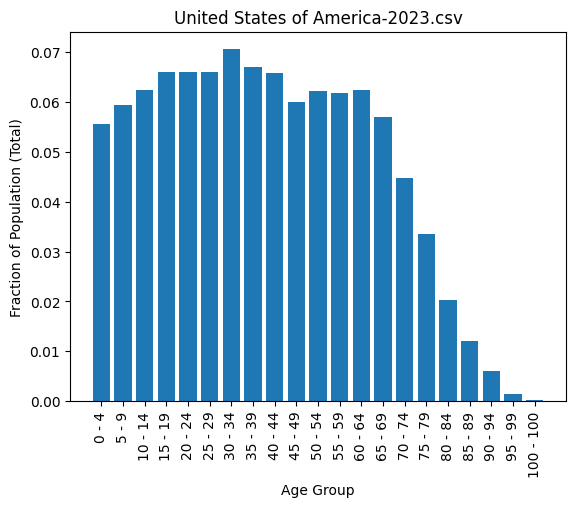

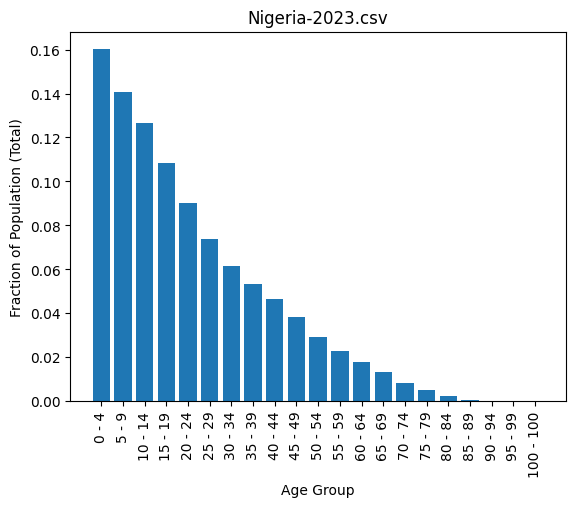

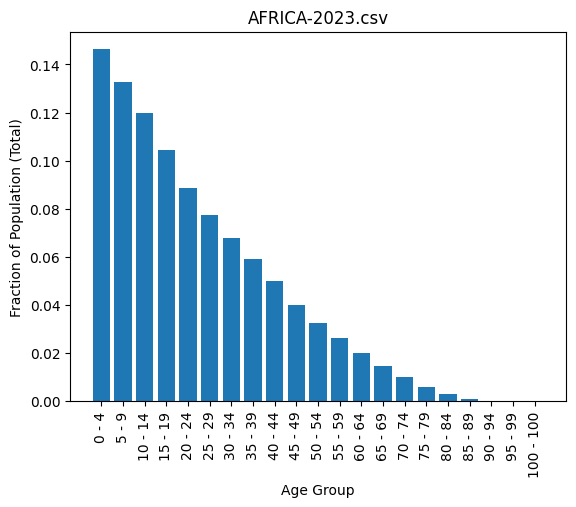

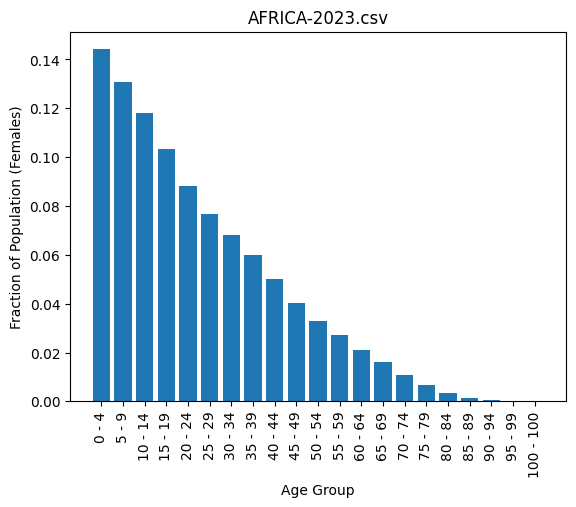

In [4]:
%matplotlib inline
import ipywidgets as widgets
from pyramid_alias import load_pyramid_csv, AliasedDistribution
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

dropdown = widgets.Dropdown(
    options=csv_files,
    description='Select a file:',
    disabled=False
)

file = csv_files[0]
count = 1_000_000
population = "Total"

def update_plot():
    global file
    data = load_pyramid_csv(Path(file), quiet=True)
    # print(data)
    global population
    if population == "Males":
        dist = AliasedDistribution(data[:, 2])
    elif population == "Females":
        dist = AliasedDistribution(data[:, 3])
    else:   # Total
        dist = AliasedDistribution(data[:, 4])
    counts = np.zeros(len(data), dtype=np.int32)
    global count
    samples = dist.sample(count)
    np.add.at(counts, samples, 1)
    distribution = counts / count
    labels = [f"{v[0]} - {v[1]}" for v in zip(data[:,0], data[:,1])]
    plt.bar(x=np.arange(len(distribution)), height=distribution, label=labels)
    plt.xticks(np.arange(len(distribution)), labels, rotation=90)  # Rotate x-axis labels to vertical
    plt.title(file.name)
    plt.ylabel(f"Fraction of Population ({population})")
    plt.xlabel("Age Group")
    plt.show()

# Function to load the selected file
def load_selected_file(change):
    selected_file = change['new']
    if selected_file:  # Check if a file is selected
        global file
        file = selected_file
        update_plot()

# Attach the load_selected_file function to the dropdown's 'value' trait
dropdown.observe(load_selected_file, names='value')
display(dropdown)

# Create the slider widget with specific values
slider = widgets.SelectionSlider(
    options=[1_000, 10_000, 100_000, 1_000_000, 10_000_000],
    value=1_000_000,  # Default value
    description='Count:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Function to update the count variable based on the slider's value
def update_count(change):
    global count
    count = change['new']
    update_plot()

# Attach the update_count function to the slider's 'value' trait
slider.observe(update_count, names='value')
display(slider)

group = widgets.Dropdown(
    options=["Total", "Males", "Females"],
    description='Select a population:',
    disabled=False
)

def update_group(change):
    global population
    population = change['new']
    update_plot()

group.observe(update_group, names='value')
display(group)

update_plot()
